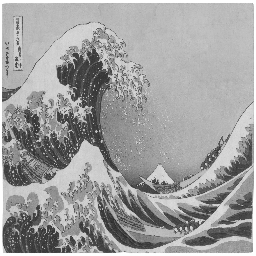

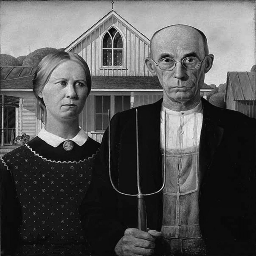

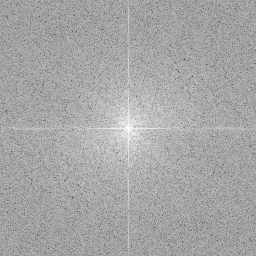

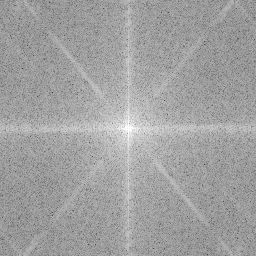

<ipython-input-19-fa40a059135a>:45: RuntimeWarning: divide by zero encountered in log
  cv2_imshow(20*np.log(np.abs(filtered_ft1)))


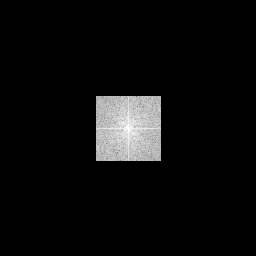

<ipython-input-19-fa40a059135a>:47: RuntimeWarning: divide by zero encountered in log
  cv2_imshow(20*np.log(np.abs(filtered_ft2)))


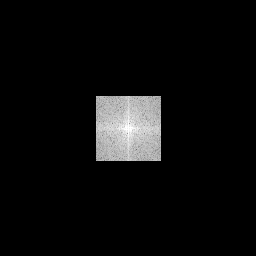

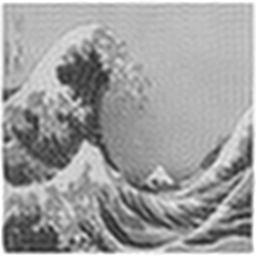

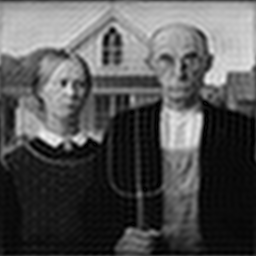

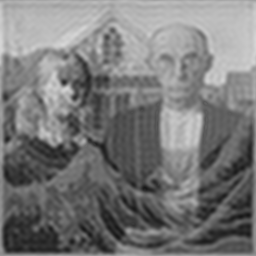

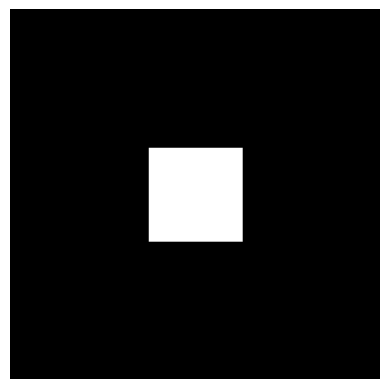

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def hybrid(s1,s2):

  img1=cv2.resize(cv2.cvtColor(cv2.imread(s1),cv2.COLOR_BGR2GRAY),(256,256))    #converts images to grayscale with size 256X256
  img2=cv2.resize(cv2.cvtColor(cv2.imread(s2),cv2.COLOR_BGR2GRAY),(256,256))

  cv2_imshow(img1)
  print('\n')
  cv2_imshow(img2)
  print('\n')

  f1=np.fft.fft2(img1)                                                          #FT of first image
  ft1= np.fft.fftshift(f1)
  magnitude1 = 20*np.log(np.abs(ft1))
  cv2_imshow(magnitude1)

  print('\n')

  f2=np.fft.fft2(img2)                                                          #FT of second image
  ft2= np.fft.fftshift(f2)
  magnitude2 = 20*np.log(np.abs(ft2))
  cv2_imshow(magnitude2)

  print('\n')

  filter=np.zeros((256,256))                                                    #low-pass filter
  filter[128-32:128+32+1,128-32:128+32+1]=1
  plt.imshow(filter,cmap='gray');plt.axis("off")

  print('\n')

  filtered_ft1=np.multiply(ft1,filter)                                          #FT after applying filter
  cv2_imshow(20*np.log(np.abs(filtered_ft1)))
  filtered_ft2=np.multiply(ft2,filter)
  cv2_imshow(20*np.log(np.abs(filtered_ft2)))

  print('\n')

  fft_ifft_shift1 = np.fft.ifftshift(filtered_ft1)                              #IFT to get the filtered image 1
  img_filtered1 = np.fft.ifft2(fft_ifft_shift1)
  img_filtered1 = np.abs(img_filtered1)
  cv2_imshow(img_filtered1)

  fft_ifft_shift2 = np.fft.ifftshift(filtered_ft2)                              #IFT to get the filtered image 2
  img_filtered2 = np.fft.ifft2(fft_ifft_shift2)
  img_filtered2 = np.abs(img_filtered2)
  cv2_imshow(img_filtered2)
  print('\n')
  hybrid_img=(img_filtered1+img_filtered2)/2                                    #averaging the filtered images
  cv2_imshow(hybrid_img)

